<div class="notebook-buttons" style="display:flex; padding-top: 5rem;padding-bottom: 2.5rem;line-height: 2.15;">
    <a href="https://colab.research.google.com/github/magdasalatka/fantastic-features/blob/main/main.ipynb">
        <div id="colab-link" style="display: flex;padding-right: 3.5rem;padding-bottom: 0.625rem;border-bottom: 1px solid #ececed; align-items: center;">
            <img class="call-to-action-img" src="img/colab.svg" width="30" height="30" style="margin-right: 10px;margin-top: auto;margin-bottom: auto;">
            <div class="call-to-action-txt">Run in Google Colab</div>
        </div>
    </a>
    <a href="https://raw.githubusercontent.com/magdasalatka/fantastic-features/main/main.ipynb" download>
        <div id="download-link" style="display: flex;padding-right: 3.5rem;padding-bottom: 0.625rem;border-bottom: 1px solid #ececed; height: auto;align-items: center;">
            <img class="call-to-action-img" src="img/download.svg" width="22" height="30" style="margin-right: 10px;margin-top: auto;margin-bottom: auto;">
            <div class="call-to-action-txt">Download Notebook</div>
        </div>
    </a>
    <a href="https://github.com/magdasalatka/fantastic-features/blob/main/main.ipynb">
        <div id="github-link" style="display: flex;padding-right: 3.5rem;padding-bottom: 0.625rem;border-bottom: 1px solid #ececed; height: auto;align-items: center;">
            <img class="call-to-action-img" src="img/github.svg" width="25" height="30" style="margin-right: 10px;margin-top: auto;margin-bottom: auto;">
            <div class="call-to-action-txt">View on GitHub</div>
        </div>
    </a>
</div>

# Back to the Feature
### Statistical feature engineering

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

from plotting import train_and_diagnose, plot_x_vs_y, plot_multiple_x_vs_y, train_xy
from dataset_noise_generator import data_to_df

/home/magdalena/repos/fantastic-features/venv/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Diabetes

In [18]:
X, y = datasets.load_diabetes(return_X_y=True)

df = data_to_df(X,y)

Expected error estimate: 1.9323541822371e-15


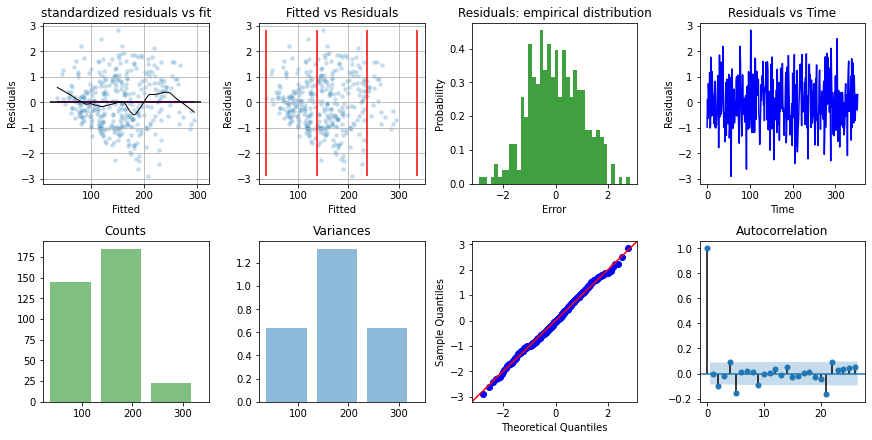

In [19]:
train_and_diagnose(X,y,draw_args={'variances_width':100,'variances_bin_type':'window'}, plot_variables=False);

Diagnostic: heteroskedasticity  
Solution: transform y. By order of severity: 
* sqrt(y) ~ x
* log(y) ~ x
* 1/y ~ x

Expected error estimate: 4.745495781035885e-15


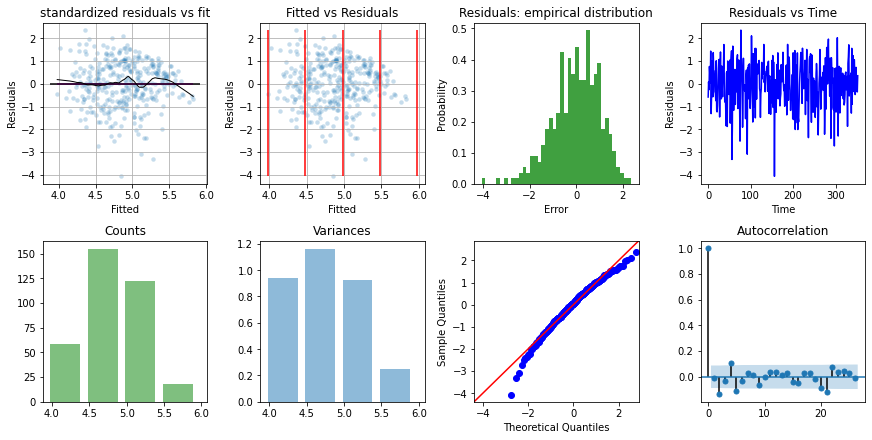

In [20]:
train_and_diagnose(X, np.log(y), draw_args={'variances_width':0.5,'variances_bin_type':'window'}, plot_variables=False);

## Interestig_data

In [21]:
df = pd.read_csv("interesting_data.csv",index_col=0)
df.head()

,x0,x1,x2,x3,x4,y
0,-0.416758,-0.056267,-2.136196,1.640271,-1.793436,-281.584502
1,-0.841747,0.502881,-1.245288,-1.057952,-0.909008,-251.361109
2,0.551454,2.292208,0.041539,-1.117925,0.539058,187.761346
3,-0.596160,-0.019130,1.175001,-0.747871,0.009025,64.041433
4,-0.878108,-0.156434,0.256570,-0.988779,-0.338822,-62.926248


X, y = datasets.load_diabetes(return_X_y=True)

df = data_to_df(X,y)
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(15,10));

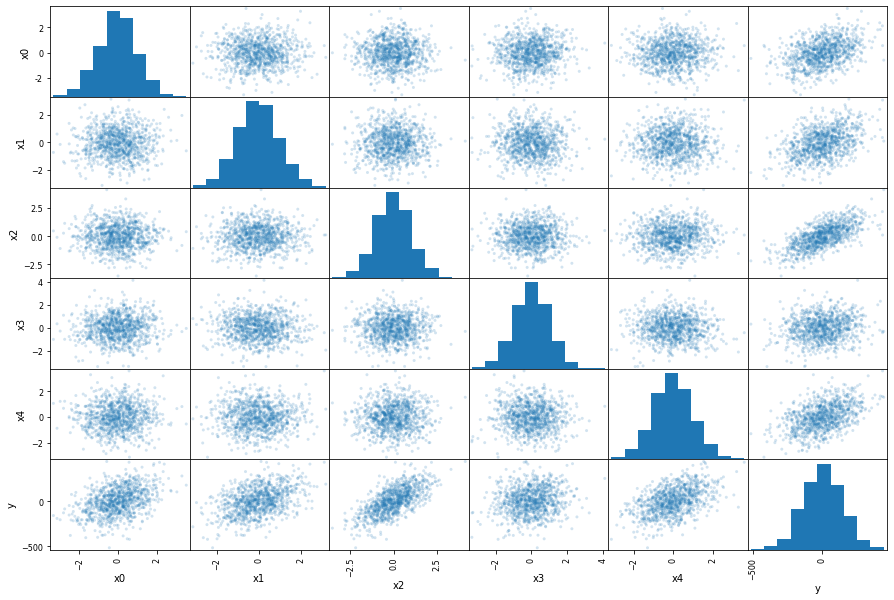

In [22]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(15,10));

Expected error estimate: 1.9323541822371e-15


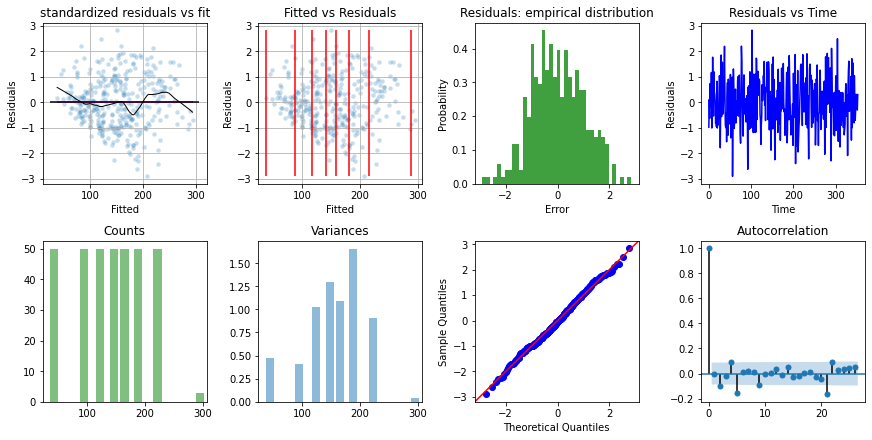

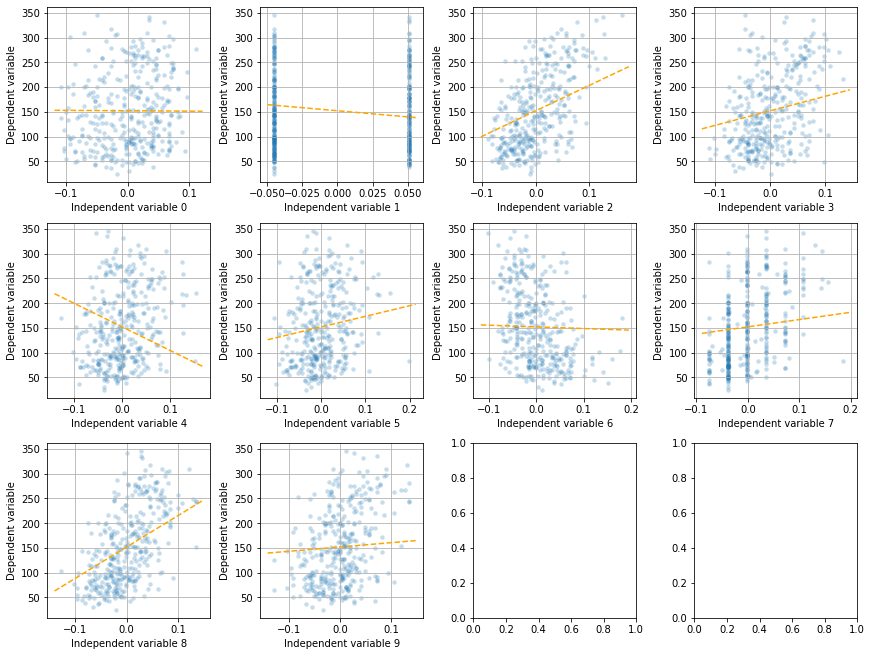

In [23]:
train_and_diagnose(X,y,draw_args={'variances_width':50,'variances_bin_type':'points'});

# Brains


In [24]:
df = pd.read_csv("data/brains.csv",index_col=0)
df.head()

,BrainWt,BodyWt
Arctic fox,44.500,3.385
Owl monkey,15.499,0.480
Beaver,8.100,1.350
Cow,423.012,464.983
Gray wolf,119.498,36.328


Expected error estimate: 1.0649077991302521e-16


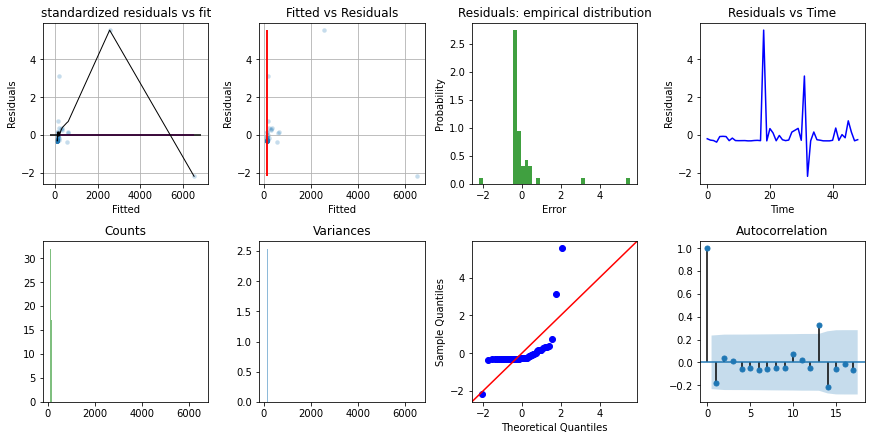

In [25]:
train_and_diagnose(df.BodyWt.to_numpy(), df.BrainWt.to_numpy(), draw_args={'variances_width':32,'variances_bin_type':'points'}, plot_variables=False);

Diagnostic: linear model is inappropriate  
Approach: use box-box to find right transformation

Expected error estimate: 4.803413902459861e-16


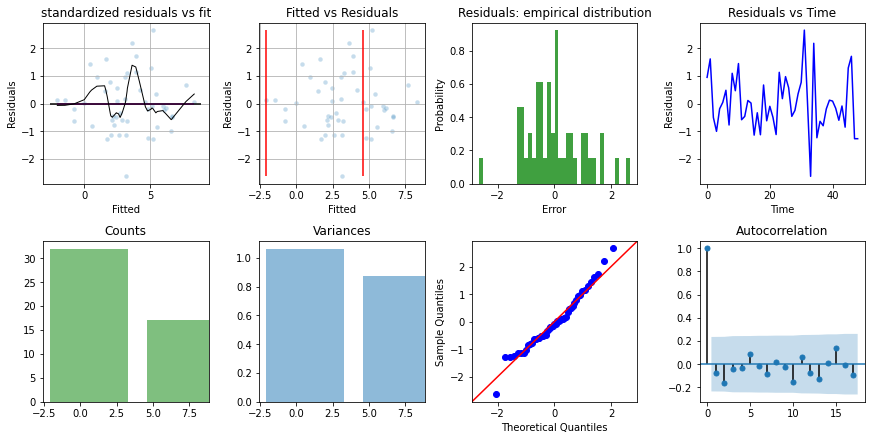

In [26]:
x_transformed, x_lambda = stats.boxcox(df.BodyWt.to_numpy())
y_transformed, y_lambda = stats.boxcox(df.BrainWt.to_numpy())
train_and_diagnose(x_transformed, y_transformed, draw_args={'variances_width':32,'variances_bin_type':'points'}, plot_variables=False);

In [27]:
# Lambdas from box-cox
print(x_lambda)
print(y_lambda)

-0.019553106620884574
-0.007753131890886812


Lambda close to zero:  
Solution: log(y) ~ log(x)

Expected error estimate: 3.0542461983565532e-15


/home/magdalena/repos/fantastic-features/venv/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


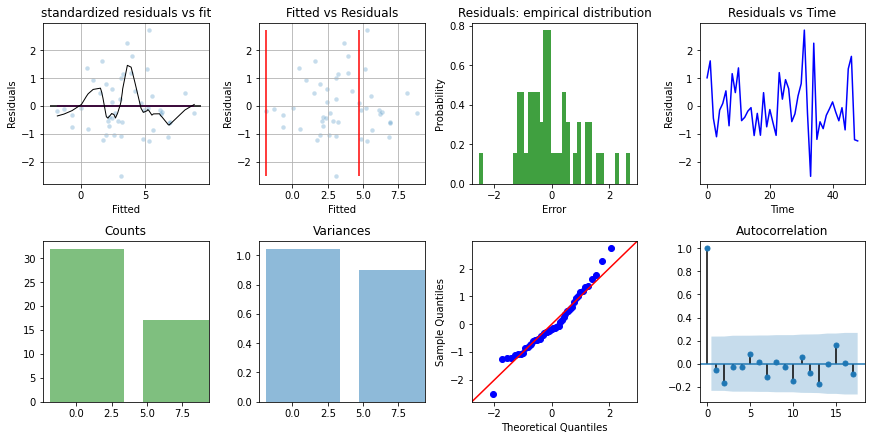

In [28]:
train_and_diagnose(np.log(df.BodyWt), np.log(df.BrainWt.to_numpy()), draw_args={'variances_width':32,'variances_bin_type':'points'}, plot_variables=False);

# Rent. @Teresa: take a look


In [29]:
df = pd.read_csv("data/rent.csv")
df.head()

,rent,rentsqm,area,yearc,location,bath,kitchen,cheating,district
0,120.974358,3.456410,35,1939.0,1,0,0,0,1112
1,436.974335,4.201676,104,1939.0,1,1,0,1,1112
2,355.743591,12.267021,29,1971.0,2,0,0,1,2114
3,282.923096,7.254436,39,1972.0,2,0,0,1,2148
4,807.230774,8.321964,97,1985.0,1,0,0,1,2222


Expected error estimate: -1.2440353007371785e-15


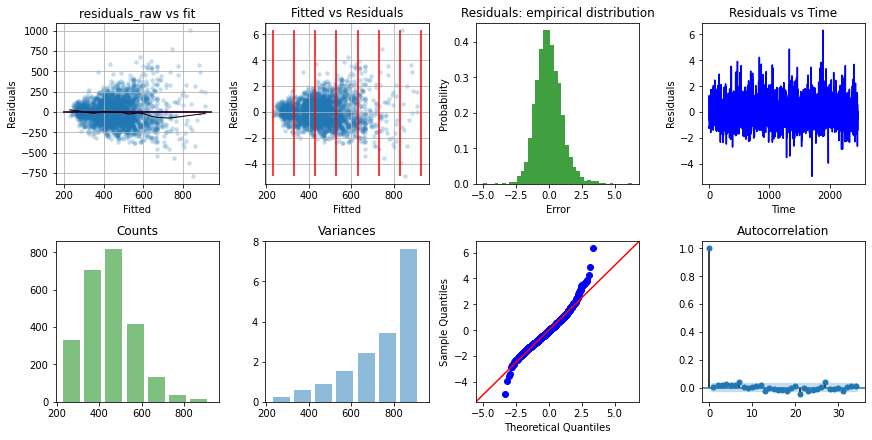

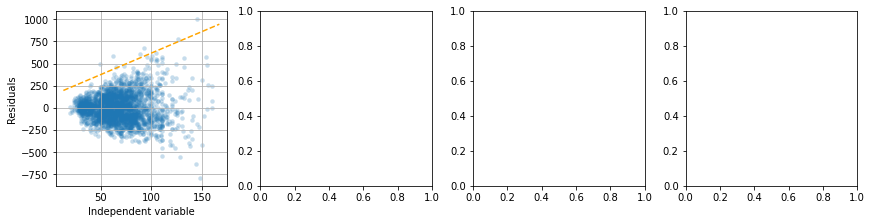

In [30]:
X = df[["area"]].to_numpy()
y = df.rent.to_numpy()
train_and_diagnose(X, y);

Diagnosis: 
* heteroskedasticity
* variables missing that describe higher values

Approach: add new vars

Expected error estimate: 2.2150187926796304e-15


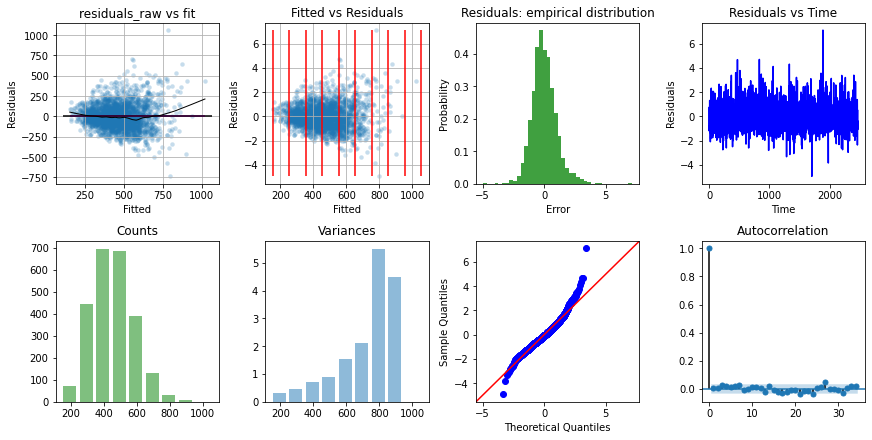

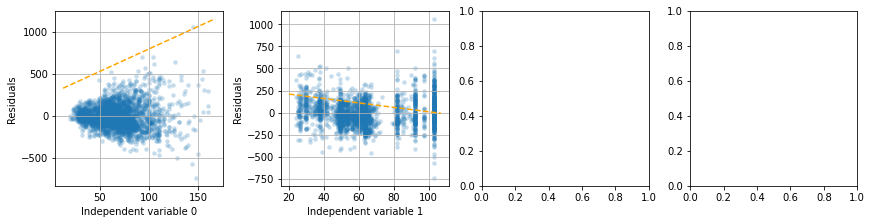

In [4]:
df["age"] = 2021 - df["yearc"]

X = df[["area", "age"]].to_numpy()
y = df.rent.to_numpy()
train_and_diagnose(X, y);
# Better! Can we improve further ?

(array([ 23.,  64.,  13.,  81.,  11.,  28.,  31.,  22., 129.,  18.,  39.,
         22.,  13.,  15.,  22., 280.,  87., 114., 113.,  26.,  96.,  59.,
        123.,  75., 126., 436.,  53.,  56.,  14.,  15.,   2.,   3.,   0.,
          0.,   1.,   7., 133.,  22.,  13.,  15.,   2.,  10.,   9., 181.,
          0.,   0.,  39.,   0.,   0., 441.]),
 array([ 24.  ,  25.58,  27.16,  28.74,  30.32,  31.9 ,  33.48,  35.06,
         36.64,  38.22,  39.8 ,  41.38,  42.96,  44.54,  46.12,  47.7 ,
         49.28,  50.86,  52.44,  54.02,  55.6 ,  57.18,  58.76,  60.34,
         61.92,  63.5 ,  65.08,  66.66,  68.24,  69.82,  71.4 ,  72.98,
         74.56,  76.14,  77.72,  79.3 ,  80.88,  82.46,  84.04,  85.62,
         87.2 ,  88.78,  90.36,  91.94,  93.52,  95.1 ,  96.68,  98.26,
         99.84, 101.42, 103.  ]),
 <a list of 50 Patch objects>)

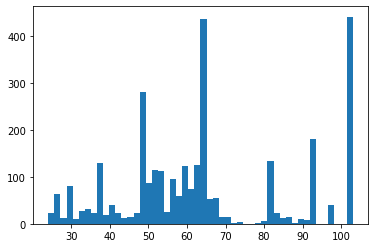

In [8]:
# Let's check age distribution
plt.hist(df.age,bins=50)

# Hits: use two models: one for old, and one for young buildings

Expected error estimate: -2.8415889485922737e-15


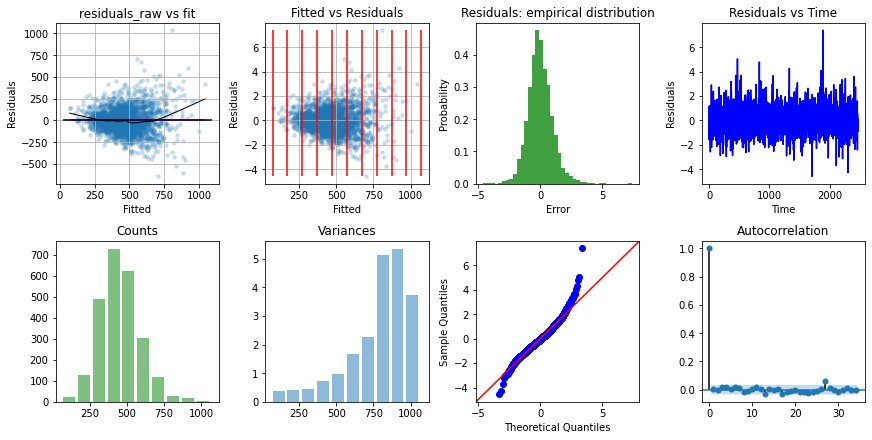

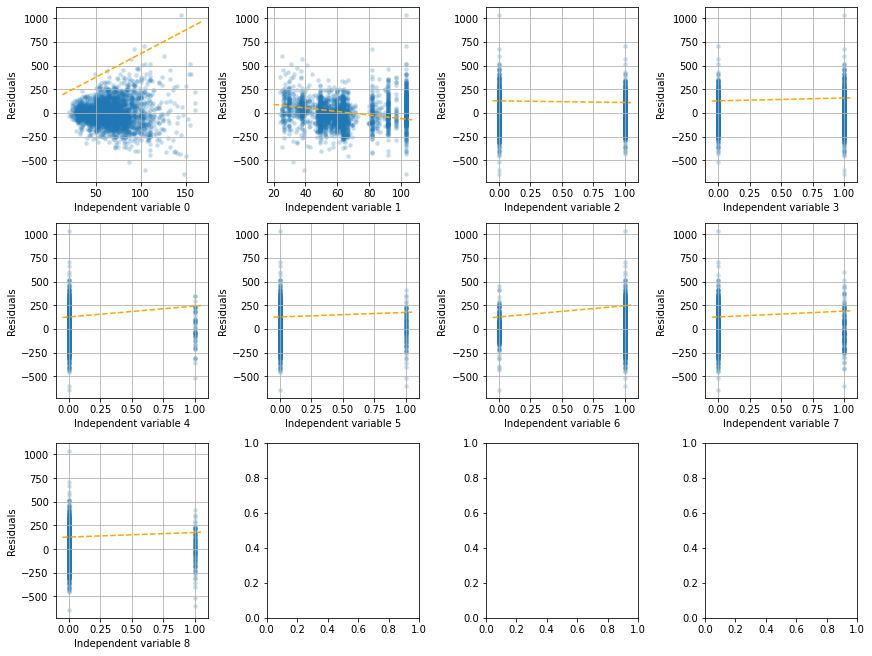

In [5]:
# Add all categories
df = pd.get_dummies(df, columns=['location'])
X = df[["area", "age", 'location_1', 'location_2', 'location_3', "kitchen", "cheating", "bath", "kitchen"]].to_numpy()
y = df.rent.to_numpy()
train_and_diagnose(X, y);

# Even better!

Expected error estimate: -1.0305391879043928e-14


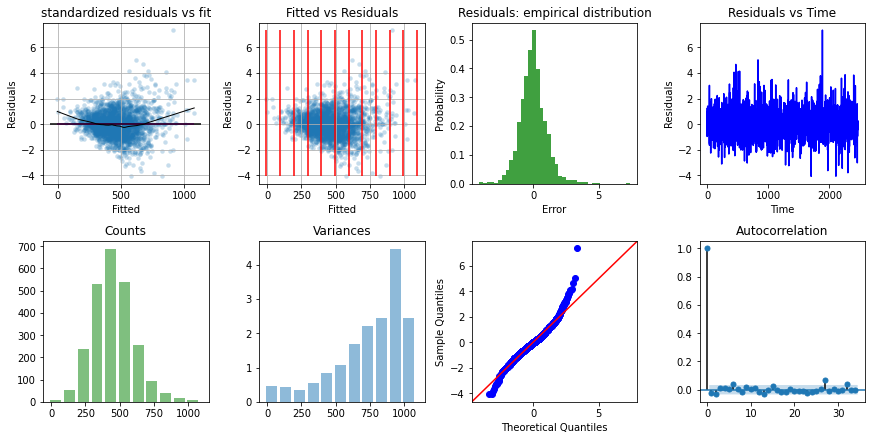

In [33]:
subset = df[["area", "age", 'location_1', 'location_2', 'location_3', "kitchen", "cheating", "bath", "kitchen", "district"]]
df_with_district = pd.get_dummies(subset, columns=['district'])
X = df_with_district.to_numpy()
y = df.rent.to_numpy()

train_and_diagnose(X, y, plot_variables=False);
# Looks much better!
# Let's remove unnecessary variables

In [34]:
X_train, y_train, model, fitted = train_xy(X, y)
is_relevant_col = model.pvalues < 0.05

subset = df_with_district.loc[:, is_relevant_col[1:]]
X  = subset.to_numpy()
X_train, y_train, model, fitted = train_xy(X, y)
residuals = y_train - fitted
model.summary()
# Same plot as before, but now we have only relevant variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     49.51
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:07:34   Log-Likelihood:                -15541.
No. Observations:                2465   AIC:                         3.120e+04
Df Residuals:                    2407   BIC:                         3.153e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.5903     15.900      7.207      0.000      83.411     145.769
x1             5.0829      0.125     40.736      0.000       4.838       5.328
x2            -1.9202      0.139    -13.839      0.000      -2.192      -1.648
x3            29.7166      5.998      4.954      0.000      17.955      41.479
x4           103.4916     18.912      5.472      0.000      66.406     140.578
x5            44.8407      6.970      6.433      0.000      31.172      58.509
x6           125.1699      9.671     12.942      0.000     106.205     144.135
x7            85.3698     11.995      7.117      0.000      61.847     108.892
x8            44.8407      6.970      6.433      0.000      31.172      58.509
x9            85.1240     44.896      1.896      0.058      -2.915     173.163
x10         -217.8949     94.885     -2.296      0.022    -403.960     -31.830
x11         -205.5713     77.503     -2.652      0.008    -357.552     -53.591
x12         -113.3000     44.927     -2.522      0.012    -201.399     -25.201
x13          107.7122     32.911      3.273      0.001      43.176     172.248
x14          274.2769    134.085      2.046      0.041      11.343     537.211
x15         -130.6469     54.895     -2.380      0.017    -238.292     -23.001
x16         -330.4580     94.990     -3.479      0.001    -516.729    -144.187
x17          223.0127     94.928      2.349      0.019      36.864     409.161
x18         -119.4690     44.879     -2.662      0.008    -207.474     -31.464
x19         -133.7228     38.869     -3.440      0.001    -209.942     -57.503
x20          147.3317     60.095      2.452      0.014      29.489     265.174
x21           58.6145     29.694      1.974      0.049       0.385     116.844
x22          257.0489    134.138      1.916      0.055      -5.990     520.088
x23           54.9853     21.992      2.500      0.012      11.861      98.110
x24          239.4027     94.827      2.525      0.012      53.452     425.353
x25         -106.0573     37.397     -2.836      0.005    -179.391     -32.724
x26          125.8498     40.658      3.095      0.002      46.121     205.579
x27          200.7291     94.948      2.114      0.035      14.541     386.918
x28           62.3471     32.877      1.896      0.058      -2.122     126.816
x29          -58.2637     30.993     -1.880      0.060    -119.038       2.511
x30          -95.0927     42.826     -2.220      0.026    -179.073     -11.112
x31          -67.8452     31.056     -2.185      0.029    -128.745      -6.946
x32         -247.0843     60.754     -4.067      0.000    -366.221    -127.948
x33         -135.2085     37.599     -3.596      0.000    -208.938     -61.479
x34          -86.8398     37.412     -2.321      0.020    -160.202     -13.477
x35          -52.8283     25.195     -2.097      0.036    -102.234      -3.422
x3

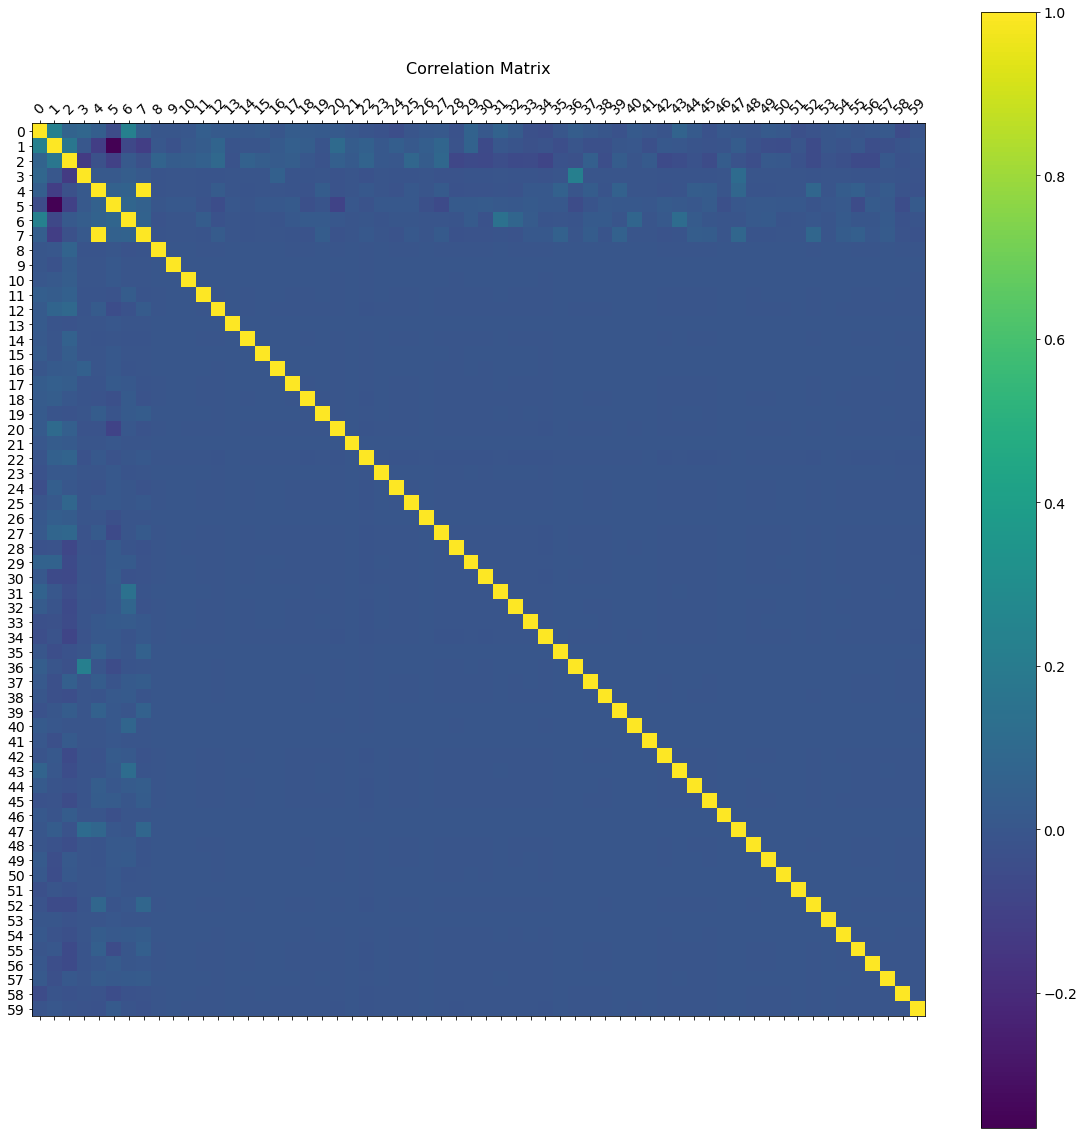

In [10]:
#Next steps: remove collinearity
# Test model performance out of sample
def plot_correlations(X: np.ndarray) -> None:
    df = pd.DataFrame(X)

    f = plt.figure(figsize=(20, 20))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16);

plot_correlations(X)

# Interesting data

In [34]:
df = pd.read_csv("interesting_data.csv", index_col=0)
df.head()

,x0,x1,x2,x3,x4,y
0,-0.416758,-0.056267,-2.136196,1.640271,-1.793436,-281.584502
1,-0.841747,0.502881,-1.245288,-1.057952,-0.909008,-251.361109
2,0.551454,2.292208,0.041539,-1.117925,0.539058,187.761346
3,-0.596160,-0.019130,1.175001,-0.747871,0.009025,64.041433
4,-0.878108,-0.156434,0.256570,-0.988779,-0.338822,-62.926248


Expected error estimate: 1.83769666151079e-15


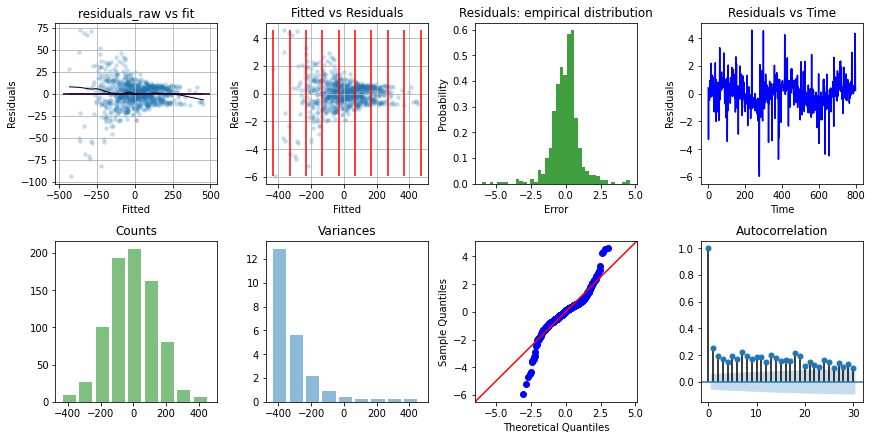

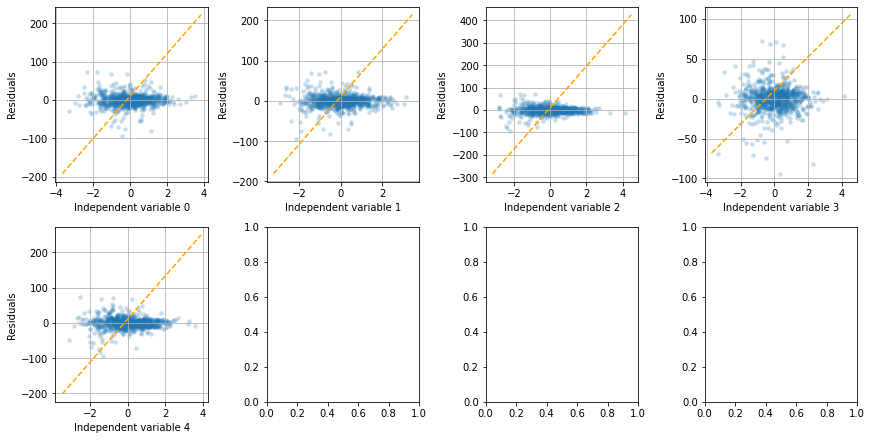

In [46]:
y = df.y.to_numpy()
X = df.loc[:, df.columns != 'y'].to_numpy()

train_and_diagnose(X, y);

# TODO: Rent 2

In [124]:
df2 = pd.read_csv("data/rent98_00.csv")
df2.head()

,rent_euro,rentsqm_euro,area,yearc,glocation,tlocation,nkitchen,pkitchen,eboden,year01,yearc2,yearc3,invarea
0,120.613754,3.446107,35,1939.0,0,0,0,0,1,0,3759721.0,7290099200,0.028571
1,435.671814,4.189152,104,1939.0,0,0,0,0,0,0,3759721.0,7290099200,0.009615
2,354.683197,12.230454,29,1971.0,1,0,0,0,1,0,3884841.0,7657021440,0.034483
3,282.079742,7.232811,39,1972.0,1,0,0,0,1,0,3888784.0,7668682240,0.025641
4,804.824524,8.297158,97,1985.0,0,0,0,0,0,0,3940225.0,7821346816,0.010309


Expected error estimate: -6.043072812105308e-08


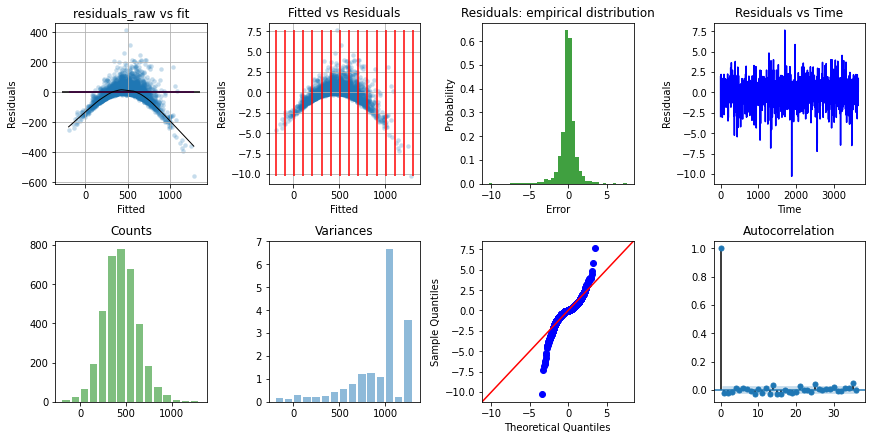

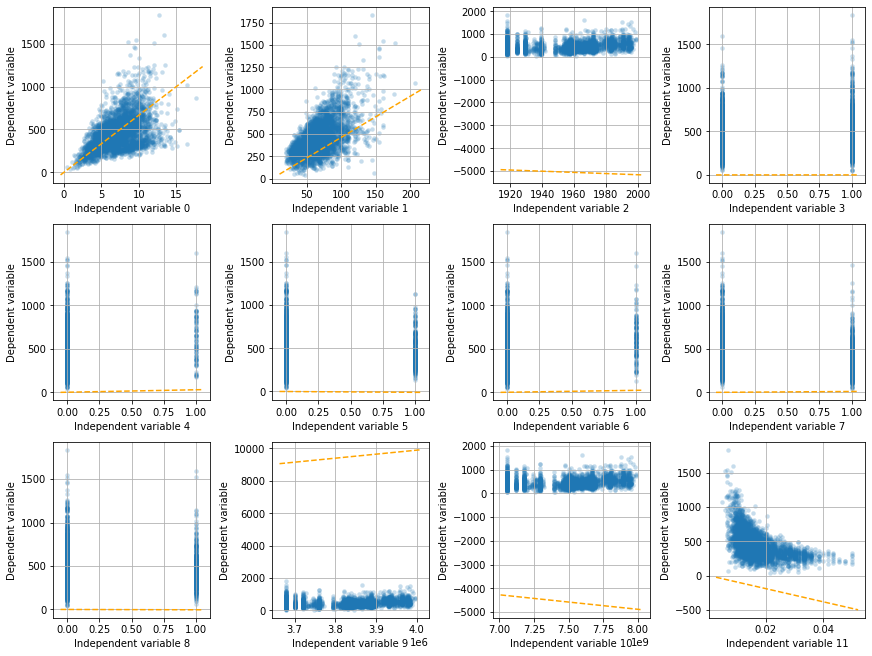

In [125]:
train_and_diagnose(df2.loc[:, df2.columns != 'rent_euro'].to_numpy(), df2.rent_euro.to_numpy());

In [126]:
df = pd.read_csv("data/mortality.csv", index_col=0)
df.head()

,Mortality,JanTemp,JulyTemp,RelHum,Rain,Educ,Dens,NonWhite,WhiteCollar,Pop,House,Income,HC,NOx,SO2
City,,,,,,,,,,,,,,,
"Akron, OH",921.87,27,71,59,36,11.4,3243,8.8,42.6,660328,3.34,29560,21,15,59
"Albany-Schenectady-Troy, NY",997.87,23,72,57,35,11.0,4281,3.5,50.7,835880,3.14,31458,8,10,39
"Allentown, Bethlehem,PA-NJ",962.35,29,74,54,44,9.8,4260,0.8,39.4,635481,3.21,31856,6,6,33
"Atlanta, GA",982.29,45,79,56,47,11.1,3125,27.1,50.2,2138231,3.41,32452,18,8,24
"Baltimore, MD",1071.29,35,77,55,43,9.6,6441,24.4,43.7,2199531,3.44,32368,43,38,206


Expected error estimate: 3.3230841246582966e-11


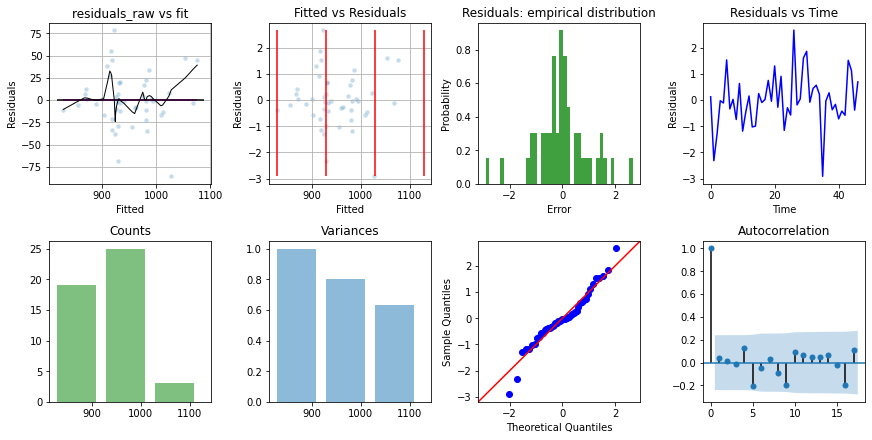

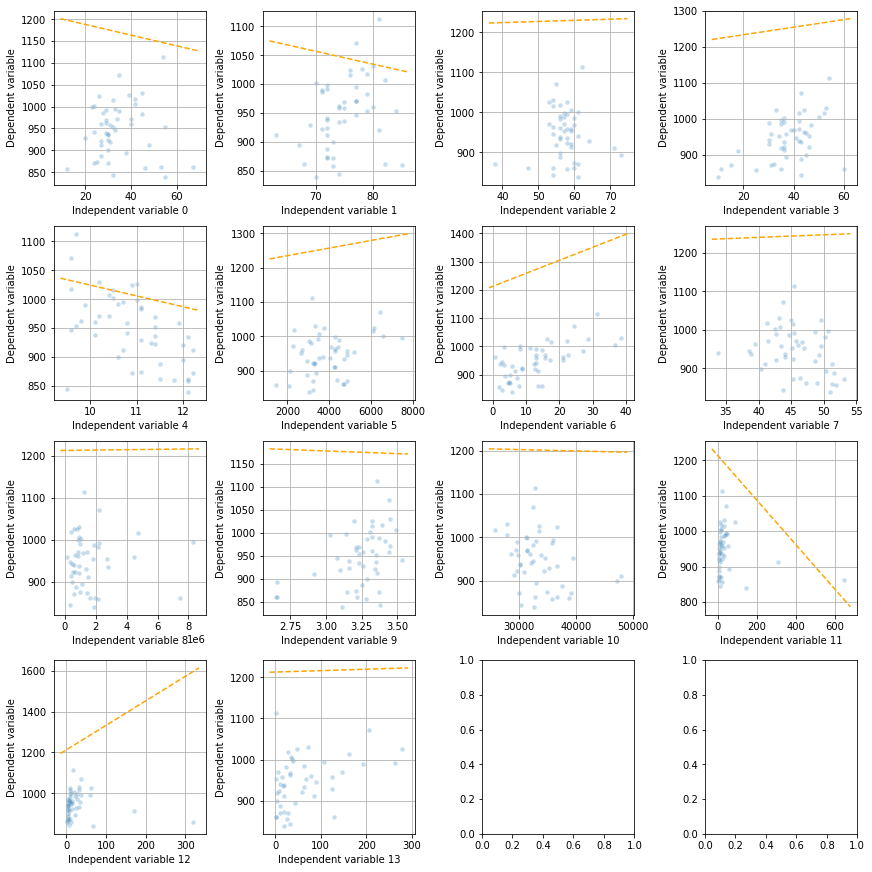

In [127]:
train_and_diagnose(df.loc[:, df.columns != 'Mortality'].to_numpy(), df.Mortality.to_numpy());

# Golf

In [128]:
df = pd.read_csv("data/golf.csv")
df.head()

,price,age,kilometer,TIA,extras1,extras2,kilometerop1,kilometerop2,kilometerop3,ageop1,ageop2,ageop3
0,7.30,73,10.0,12,1,1,-2.797732,5.303326,-6.988968,-2.120307,2.462450,-1.737513
1,3.85,115,30.0,20,1,0,-2.349144,3.556625,-3.236118,0.095388,-0.932405,-0.619710
2,2.95,127,43.0,6,0,1,-2.057561,2.580604,-1.549422,0.728443,-0.124933,-0.846142
3,4.80,104,54.0,25,1,1,-1.810837,1.852792,-0.522595,-0.484913,-0.978622,0.450312
4,6.20,86,57.0,23,0,0,-1.743548,1.669897,-0.300118,-1.434497,0.377569,1.045731


Expected error estimate: -2.920129669295102e-14


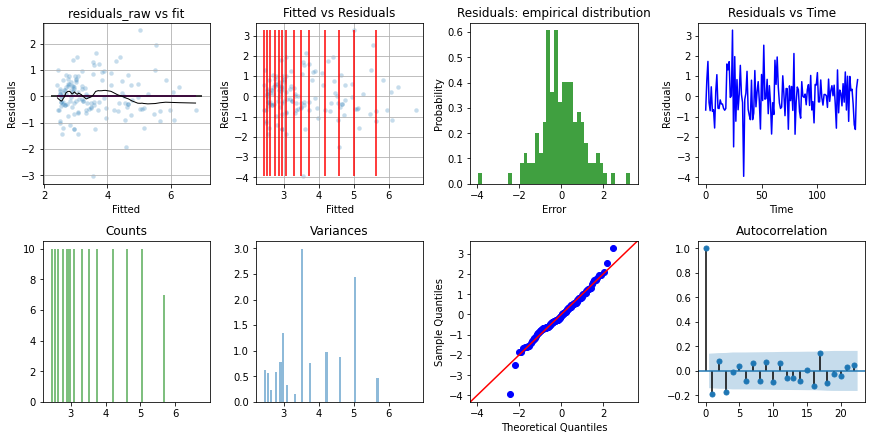

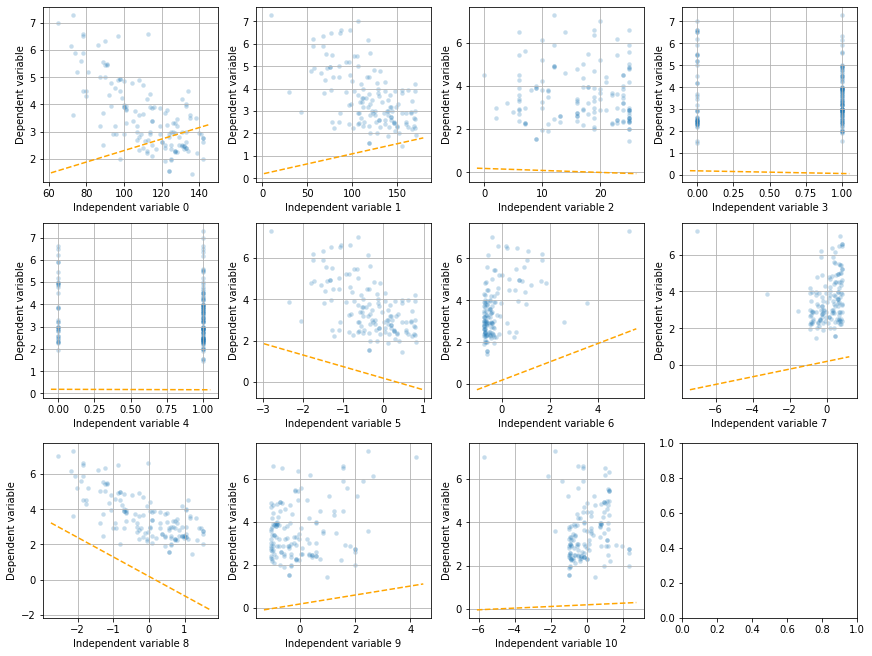

In [129]:
train_and_diagnose(df.loc[:, df.columns != 'price'].to_numpy(), df.price.to_numpy(), draw_args={'variances_width':10,'variances_bin_type':'points'});
#Diagnosis: looks good